In [2]:
!pip install yt-dlp


In [3]:
# Downloaded the video from youtube 

import yt_dlp as ytdlp

# YouTube video URL
url = "https://www.youtube.com/watch?v=o3xE32ovIMo"

def download_youtube_video(url, output_filename="time_lapse.mp4"):
    print("Starting video download...")  # Debugging message to check if the function starts
    ydl_opts = {
        'outtmpl': output_filename,  # Specify output file
    }
    
    try:
        with ytdlp.YoutubeDL(ydl_opts) as ydl:
            print(f"Downloading video from {url}...")  # Debugging message to check the download step
            ydl.download([url])
        print(f"Video downloaded as '{output_filename}'")  # Confirmation message after download
    except Exception as e:
        print(f"Error: {str(e)}")  # Print any error that occurs

    return output_filename

# Call the function
download_youtube_video(url)


Starting video download...
[youtube] Extracting URL: https://www.youtube.com/watch?v=o3xE32ovIMo
[youtube] o3xE32ovIMo: Downloading webpage
[youtube] o3xE32ovIMo: Downloading ios player API JSON
[youtube] o3xE32ovIMo: Downloading mweb player API JSON
[youtube] o3xE32ovIMo: Downloading m3u8 information


[info] o3xE32ovIMo: Downloading 1 format(s): 18
[download] time_lapse.mp4 has already been downloaded
[download] 100% of    2.21MiB
Video downloaded as 'time_lapse.mp4'


'time_lapse.mp4'

In [4]:

import yt_dlp as ytdlp

# YouTube video URL
url = "https://www.youtube.com/watch?v=o3xE32ovIMo"

def download_youtube_video(url, output_filename="time_lapse.mp4"):
    ydl_opts = {
        'format': 'mp4',  # Request MP4 format
        'outtmpl': output_filename,  # Specify output file
    }
    with ytdlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])
    print(f"Video downloaded as '{output_filename}'")
    return output_filename

# Download the video
download_youtube_video(url)

[youtube] Extracting URL: https://www.youtube.com/watch?v=o3xE32ovIMo
[youtube] o3xE32ovIMo: Downloading webpage
[youtube] o3xE32ovIMo: Downloading ios player API JSON
[youtube] o3xE32ovIMo: Downloading mweb player API JSON
[youtube] o3xE32ovIMo: Downloading m3u8 information
[info] o3xE32ovIMo: Downloading 1 format(s): 18
[download] time_lapse.mp4 has already been downloaded
[download] 100% of    2.21MiB
Video downloaded as 'time_lapse.mp4'


'time_lapse.mp4'

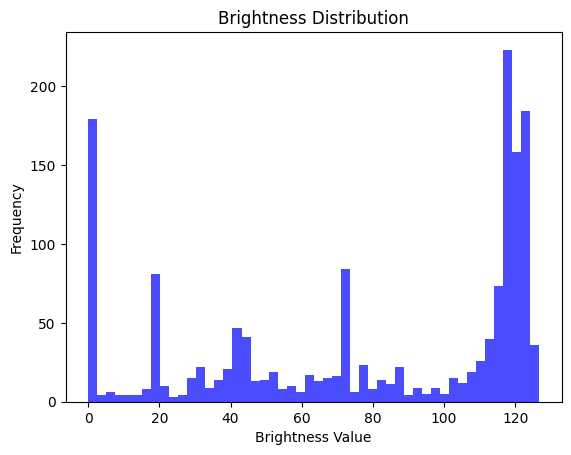

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_brightness(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    brightness = np.mean(hsv[:, :, 2])  # Get the brightness channel (V)
    return brightness

# Load the video
video_path = "time_lapse.mp4"  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

brightness_values = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    brightness = calculate_brightness(frame)
    brightness_values.append(brightness)

cap.release()

# Plot the brightness distribution
plt.hist(brightness_values, bins=50, color='blue', alpha=0.7)
plt.title("Brightness Distribution")
plt.xlabel("Brightness Value")
plt.ylabel("Frequency")
plt.show()


End of video or error reading frame.
Minimum Brightness: 0.00
Maximum Brightness: 126.74


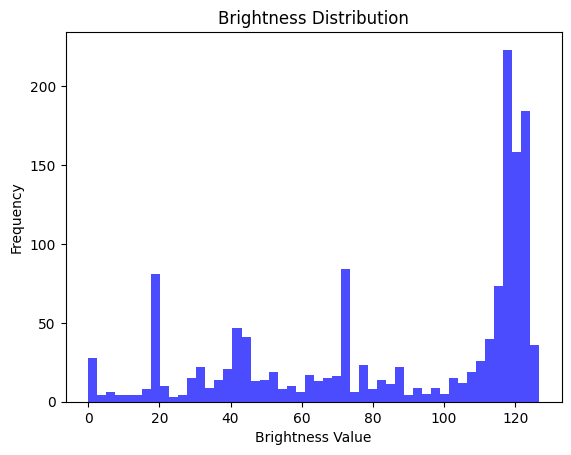

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_brightness(frame):
    # Convert the frame to HSV (Hue, Saturation, Value) color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Calculate the average brightness (Value channel)
    brightness = np.mean(hsv[:, :, 2])  # Get the brightness channel (V)
    return brightness

# Load the video
video_path = "time_lapse.mp4"  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

brightness_values = []

while True:
    ret, frame = cap.read()
    if not ret:
        print("End of video or error reading frame.")
        break  # Break the loop when video ends or an error occurs

    # Calculate brightness for the current frame
    brightness = calculate_brightness(frame)

    # Skip brightness values that are 0.00
    if brightness > 0:
        brightness_values.append(brightness)

# Calculate min and max brightness
if brightness_values:
    min_brightness = np.min(brightness_values)
    max_brightness = np.max(brightness_values)
    # Print minimum and maximum brightness values
    print(f"Minimum Brightness: {min_brightness:.2f}")
    print(f"Maximum Brightness: {max_brightness:.2f}")
else:
    print("No valid brightness values.")

cap.release()

# Plot the brightness distribution if values are present
if brightness_values:
    plt.hist(brightness_values, bins=50, color='blue', alpha=0.7)
    plt.title("Brightness Distribution")
    plt.xlabel("Brightness Value")
    plt.ylabel("Frequency")
    plt.show()


#### Using Dynamic Thresholds

In [7]:
import cv2
import numpy as np

# Function to categorize brightness using dynamic thresholds
def categorize_brightness(frame, max_brightness):
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Calculate the average brightness
    brightness = np.mean(gray_frame)  # Mean of pixel values in grayscale
    
    # Define dynamic thresholds based on max brightness
    day_threshold = max_brightness * 0.8  # 80% of max brightness for Day
    evening_threshold = max_brightness * 0.4  # 40% of max brightness for Evening

    # Categorize based on dynamic thresholds
    if brightness > day_threshold:  
        return "Day"
    elif brightness > evening_threshold:  
        return "Evening"
    else:  
        return "Night"


# Input video file path
video_path = "time_lapse.mp4" 
cap = cv2.VideoCapture(video_path)

# Initialize variables
day_count = 0
evening_count = 0
night_count = 0
total_frames = 0
max_brightness = 0  # Initialize the max brightness

# Process the video frames to find the max brightness and categorize frames
while True:
    ret, frame = cap.read()
    if not ret:
        break  

    # Calculate max brightness over all frames
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    brightness = np.mean(gray_frame)
    max_brightness = max(max_brightness, brightness)  # Update max brightness
    
    total_frames += 1

# Reset the video capture to start processing frames again
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# Initialize counters for categories again
day_count = 0
evening_count = 0
night_count = 0

# Process the video frames again to categorize them
while True:
    ret, frame = cap.read()
    if not ret:
        break  

    # Categorize the current frame using dynamic thresholding
    category = categorize_brightness(frame, max_brightness)
    
    # Increment the appropriate counter
    if category == "Day":
        day_count += 1
    elif category == "Evening":
        evening_count += 1
    else:
        night_count += 1

# Release the video capture object
cap.release()

# Calculate percentages
if total_frames > 0:
    day_percentage = (day_count / total_frames) * 100
    evening_percentage = (evening_count / total_frames) * 100
    night_percentage = (night_count / total_frames) * 100

    # Print the results
    print(f"Day: {day_percentage:.2f}%")
    print(f"Evening: {evening_percentage:.2f}%")
    print(f"Night: {night_percentage:.2f}%")
else:
    print("No frames processed.")


Day: 48.84%
Evening: 17.95%
Night: 33.21%


### Using RGB channels

In [8]:
import cv2
import numpy as np

# Function to categorize brightness based on RGB channels with dynamic thresholding
def categorize_brightness_rgb(frame, max_brightness):
    # Split the frame into R, G, and B channels
    b, g, r = cv2.split(frame)
    
    # Calculate average brightness as the mean of R, G, B channels
    brightness = (np.mean(r) + np.mean(g) + np.mean(b)) / 3
    
    # Define dynamic thresholds based on max brightness
    day_threshold = max_brightness * 0.8  # 80% of max brightness for Day
    evening_threshold = max_brightness * 0.4  # 40% of max brightness for Evening

    # Categorize based on dynamic thresholds
    if brightness > day_threshold:  
        return "Day"
    elif brightness > evening_threshold:  
        return "Evening"
    else:  
        return "Night"

# Function to analyze color ratios (for example, high red content)
def analyze_color_ratios(frame):
    b, g, r = cv2.split(frame)
    total = np.sum(r) + np.sum(g) + np.sum(b)
    
    if total == 0:
        return None  # Return None if there is no color data
    
    red_ratio = np.sum(r) / total
    green_ratio = np.sum(g) / total
    blue_ratio = np.sum(b) / total

    return red_ratio, green_ratio, blue_ratio

# Input video file path
video_path = "time_lapse.mp4"  
cap = cv2.VideoCapture(video_path)

# Initialize counters and max brightness
day_count = 0
evening_count = 0
night_count = 0
total_frames = 0
max_brightness = 0  # Initialize the max brightness

# First loop: Calculate max brightness across all frames
while True:
    ret, frame = cap.read()
    if not ret:
        break 
    
    # Convert frame to RGB and calculate brightness
    b, g, r = cv2.split(frame)
    brightness = (np.mean(r) + np.mean(g) + np.mean(b)) / 3
    max_brightness = max(max_brightness, brightness)
    
    total_frames += 1

# Reset video capture to start processing frames again
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

# Initialize counters for categories again
day_count = 0
evening_count = 0
night_count = 0

# Second loop: Process the video frames to categorize them using dynamic thresholds
while True:
    ret, frame = cap.read()
    if not ret:
        break 
    
    # Categorize the current frame based on dynamic brightness threshold
    category = categorize_brightness_rgb(frame, max_brightness)
    
    # Increment the appropriate counter
    if category == "Day":
        day_count += 1
    elif category == "Evening":
        evening_count += 1
    else:
        night_count += 1
    
    # No need to analyze or print color ratios anymore, so we remove the color ratio analysis code
    # color_ratios = analyze_color_ratios(frame)

    # The previous code that prints color ratios is removed
    
# Release the video capture object
cap.release()

# Calculate percentages
if total_frames > 0:
    day_percentage = (day_count / total_frames) * 100
    evening_percentage = (evening_count / total_frames) * 100
    night_percentage = (night_count / total_frames) * 100

    # Print the results
    print(f"Day: {day_percentage:.2f}%")
    print(f"Evening: {evening_percentage:.2f}%")
    print(f"Night: {night_percentage:.2f}%")
else:
    print("No frames processed.")


Day: 49.03%
Evening: 18.27%
Night: 32.71%


In [9]:
##Print the number of frames in each category

print(f"Total Frames: {total_frames}")
print(f"Day Frames: {day_count}")
print(f"Evening Frames: {evening_count}")
print(f"Night Frames: {night_count}")

Total Frames: 1593
Day Frames: 781
Evening Frames: 291
Night Frames: 521
